In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

stock_data = pd.read_csv('01_01_18_to_13_03_23.csv')
stock_data = stock_data[['Date', 'Price']]
stock_data = stock_data.set_index('Date', drop = True)
stock_data = stock_data.iloc[::-1]
stock_data.index = pd.to_datetime(stock_data.index, format="%d/%m/%Y")
stock_data.head()

,Price
Date,
2018-01-02,21.37
2018-01-03,21.15
2018-01-04,20.97
2018-01-05,21.11
2018-01-08,22.43


Text(0, 0.5, 'Prices ($)')

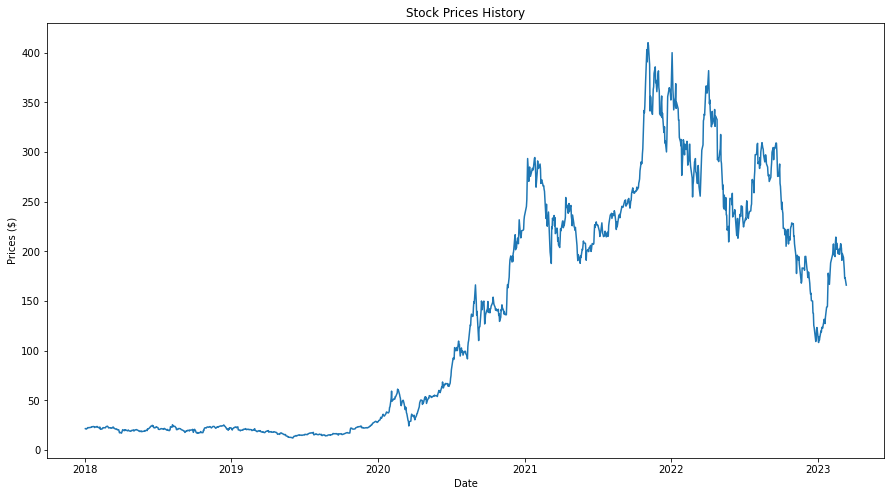

In [2]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Price'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [3]:
close_prices = stock_data['Price']
values = close_prices.values
training_data_len = math.ceil(len(values)*0.8 )

#scaler = MinMaxScaler(feature_range=(0,1))
#scaled_data = scaler.fit_transform(values.reshape(-1,1))

#train_data = scaled_data[0: training_data_len, :]
values = values.reshape(-1,1)
train_data = values[0: training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [4]:
test_data = values[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [5]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 10, epochs=20)


Epoch 1/20
99/99 [==============================] - 6s 27ms/step - loss: 16871.6973
Epoch 2/20
99/99 [==============================] - 3s 26ms/step - loss: 4578.7339
Epoch 3/20
99/99 [==============================] - 3s 27ms/step - loss: 1133.0231
Epoch 4/20
99/99 [==============================] - 3s 28ms/step - loss: 578.6640
Epoch 5/20
99/99 [==============================] - 3s 30ms/step - loss: 264.2933
Epoch 6/20
99/99 [==============================] - 3s 27ms/step - loss: 149.5587
Epoch 7/20
99/99 [==============================] - 3s 27ms/step - loss: 138.2184
Epoch 8/20
99/99 [==============================] - 3s 29ms/step - loss: 120.3190
Epoch 9/20
99/99 [==============================] - 3s 29ms/step - loss: 93.6355
Epoch 10/20
99/99 [==============================] - 3s 26ms/step - loss: 73.5385
Epoch 11/20
99/99 [==============================] - 3s 27ms/step - loss: 79.7944
Epoch 12/20
99/99 [==============================] - 3s 27ms/step - loss: 63.9595
Epoch 13/20
9

In [7]:
predictions = model.predict(x_test)
#predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

9/9 [==============================] - 1s 15ms/step


21.517430078499164

<ipython-input-8-8bc04b94385a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


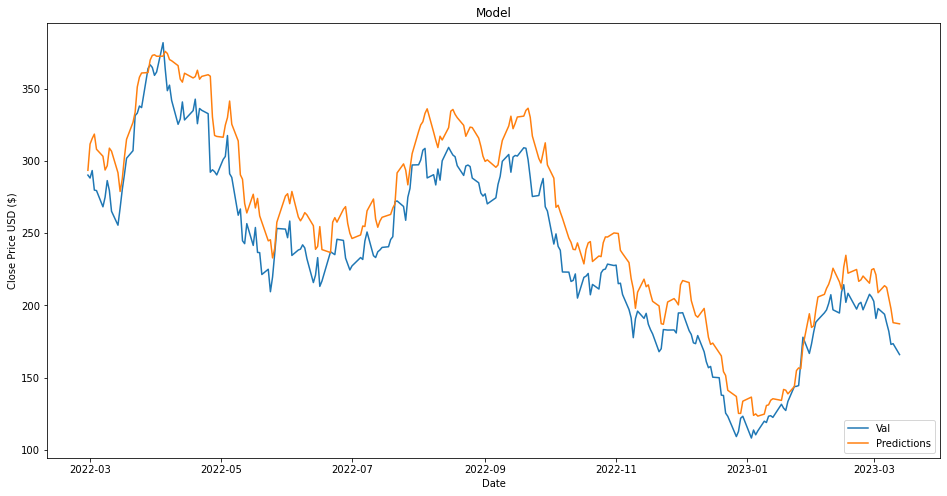

In [8]:
data = stock_data.filter(['Price'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
#plt.plot(train)
plt.plot(validation[['Price', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

In [10]:
x_test

array([[[365.  ],
        [361.53],
        [338.32],
        ...,
        [254.68],
        [266.92],
        [269.96]],

       [[361.53],
        [338.32],
        [336.34],
        ...,
        [266.92],
        [269.96],
        [290.14]],

       [[338.32],
        [336.34],
        [350.58],
        ...,
        [269.96],
        [290.14],
        [288.12]],

       ...,

       [[179.05],
        [167.82],
        [160.95],
        ...,
        [193.81],
        [187.71],
        [182.  ]],

       [[167.82],
        [160.95],
        [156.8 ],
        ...,
        [187.71],
        [182.  ],
        [172.92]],

       [[160.95],
        [156.8 ],
        [157.67],
        ...,
        [182.  ],
        [172.92],
        [173.44]]])

In [11]:
x_test.shape

(261, 60, 1)

In [12]:
predictions

array([[293.45923 ],
       [311.63962 ],
       [315.49435 ],
       [318.51596 ],
       [308.04034 ],
       [303.1919  ],
       [293.6696  ],
       [296.62753 ],
       [308.81024 ],
       [306.6857  ],
       [291.76535 ],
       [278.79956 ],
       [287.41675 ],
       [302.5393  ],
       [314.91766 ],
       [326.6366  ],
       [333.76474 ],
       [351.20288 ],
       [357.9271  ],
       [360.83896 ],
       [361.12076 ],
       [369.8134  ],
       [373.0256  ],
       [373.44525 ],
       [372.42383 ],
       [372.4812  ],
       [375.80997 ],
       [374.352   ],
       [370.13626 ],
       [369.30267 ],
       [365.92383 ],
       [356.65903 ],
       [354.49487 ],
       [360.6865  ],
       [357.40875 ],
       [358.32788 ],
       [362.7539  ],
       [356.54224 ],
       [358.4806  ],
       [359.64673 ],
       [358.6137  ],
       [330.40485 ],
       [317.58847 ],
       [316.9255  ],
       [316.34644 ],
       [324.74768 ],
       [329.97333 ],
       [341.4